<a href="https://colab.research.google.com/github/Aytsan11/ML/blob/main/ML_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
!pip install pandas scikit-learn seaborn scipy

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# –ó–∞–≥—Ä—É–∑–∫–∞ –Ω–∞–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö
df = pd.read_csv('/content/employee.csv')

In [51]:
df

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       promotion_last_5years department  salary  left  
0                          0      sales     low     1  
1                          0      sales  medium     1  
2                          0      sales  medium     1  
3                          0      sales     low     1  
4                          0      sales     low     1  
...                      ...        ...     ...   ...  
14994                      0    support     low     1  
14995                      0    support     low     1  
14996                      0    support     low     1  
14997                      0    support     low     1  
14998                      0    support     low     1  

[14999 rows x 10 columns]

In [52]:
df.department = df.department.astype('category')
df.salary = df.salary.map({'low': 1, 'medium': 2, 'high': 3})

In [53]:
y_regression = df['average_montly_hours'] # —á–∏—Å–ª–æ–≤–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –∫–∞–∫ y
X_regression = df.copy().drop('average_montly_hours', axis=1).reindex() # –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≤–ª–∏—è–Ω–∏—è

y_classification = df['salary'] # –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω–∞—è –ø–µ—Ä–µ–º–µ–Ω–Ω–∞—è –∫–∞–∫ y
X_classification = df.copy().drop('salary', axis=1).reindex() # –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –≤–ª–∏—è–Ω–∏—è

In [54]:
X_regression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   satisfaction_level     14999 non-null  float64 
 1   last_evaluation        14999 non-null  float64 
 2   number_project         14999 non-null  int64   
 3   time_spend_company     14999 non-null  int64   
 4   Work_accident          14999 non-null  int64   
 5   promotion_last_5years  14999 non-null  int64   
 6   department             14999 non-null  category
 7   salary                 14999 non-null  int64   
 8   left                   14999 non-null  int64   
dtypes: category(1), float64(2), int64(6)
memory usage: 952.6 KB


In [55]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [56]:
# –í—ã–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –∫–æ–ª–æ–Ω–æ–∫
numerical_features_regression = X_regression.select_dtypes(include=['float64', 'int64']).columns
categorical_features_regression = X_regression.select_dtypes(include=['category']).columns

numerical_features_classification = X_classification.select_dtypes(include=['float64', 'int64']).columns
categorical_features_classification = X_classification.select_dtypes(include=['category']).columns

# –°–æ–∑–¥–∞–Ω–∏–µ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä–æ–≤
preprocessor_regression = ColumnTransformer(
  [
    ('num', StandardScaler(), numerical_features_regression),
    ('cat', OneHotEncoder(), categorical_features_regression),
  ],
  verbose=True
)

preprocessor_classification = ColumnTransformer(
  [
    ('num', StandardScaler(), numerical_features_classification),
    ('cat', OneHotEncoder(), categorical_features_classification)
  ],
  verbose=True
)

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=28
)

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),  # –í–∫–ª—é—á–∞–µ—Ç StandardScaler –∏ OneHotEncoder
    ('regressor', LinearRegression())          # –ú–æ–¥–µ–ª—å
], verbose=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
regression_pipeline.fit(X_train_reg, y_train_reg)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_reg = regression_pipeline.predict(X_test_reg)

# –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

print(f"\n–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): {mse:.4f}")
print(f"–ö–æ—Ä–µ–Ω—å –∏–∑ MSE (RMSE): {rmse:.4f}")
print(f"–°—Ä–µ–¥–Ω–∏–π –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ—à–∏–±–∫–∏ (MAPE): {mape:.4f}, —Ç–æ –µ—Å—Ç—å {mape * 100:.4f}%")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s

–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): 1952.4704
–ö–æ—Ä–µ–Ω—å –∏–∑ MSE (RMSE): 44.1868
–°—Ä–µ–¥–Ω–∏–π –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ—à–∏–±–∫–∏ (MAPE): 0.1977, —Ç–æ –µ—Å—Ç—å 19.7656%


In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=28
)

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),  # –í–∫–ª—é—á–∞–µ—Ç StandardScaler –∏ OneHotEncoder
    ('classifier', DecisionTreeClassifier(random_state=42))
], verbose=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
classification_pipeline.fit(X_train_clf, y_train_clf)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_clf = classification_pipeline.predict(X_test_clf)
y_pred_proba_clf = classification_pipeline.predict_proba(X_test_clf)

# –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
auc = roc_auc_score(y_test_clf, y_pred_proba_clf, multi_class='ovr', average='weighted')
logloss = log_loss(y_test_clf, y_pred_proba_clf)

print(f"–¢–æ—á–Ω–æ—Å—Ç—å (accuracy): {accuracy:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å (precision): {precision:.4f}")
print(f"–ü–æ–ª–Ω–æ—Ç–∞ (recall): {recall:.4f}")
print(f"F1-–º–µ—Ä–∞: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –ø–æ—Ç–µ—Ä—è (log-loss): {logloss:.4f}")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
–¢–æ—á–Ω–æ—Å—Ç—å (accuracy): 0.6087
–¢–æ—á–Ω–æ—Å—Ç—å (precision): 0.6102
–ü–æ–ª–Ω–æ—Ç–∞ (recall): 0.6087
F1-–º–µ—Ä–∞: 0.6094
AUC: 0.6575
–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –ø–æ—Ç–µ—Ä—è (log-loss): 14.0938


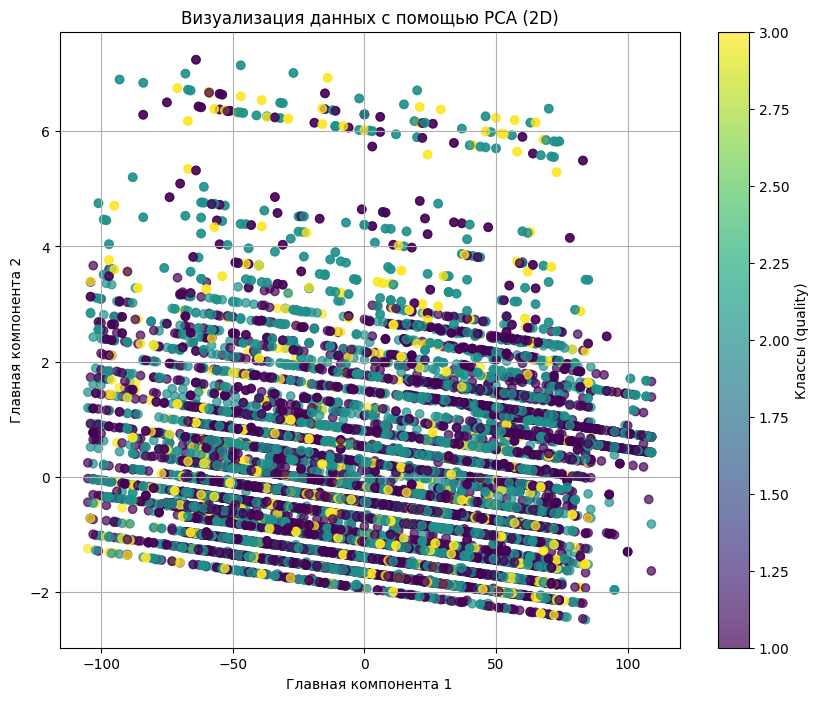

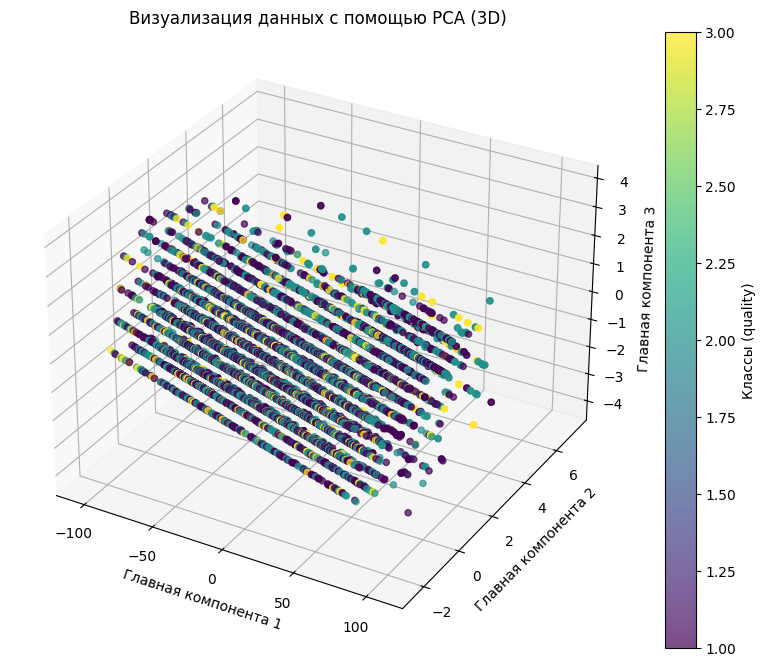

–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (2D): 0.5997
–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (3D): 0.5980


In [59]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

# 2D –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ö–ª–∞—Å—Å—ã (quality)')
plt.title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é PCA (2D)")
plt.xlabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
plt.ylabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
plt.grid(True)
plt.show()

# 3D –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è PCA
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ö–ª–∞—Å—Å—ã (quality)')
ax.set_title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é PCA (3D)")
ax.set_xlabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
ax.set_ylabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
ax.set_zlabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 3")
plt.show()

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è PCA (2D –∏ 3D)
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_pca_2d, y_classification, test_size=0.2, random_state=42)
X_train_3d, X_test_3d = train_test_split(X_pca_3d, test_size=0.2, random_state=42)

# –ú–æ–¥–µ–ª—å
clf = RandomForestClassifier(random_state=42)

# –û–±—É—á–µ–Ω–∏–µ –Ω–∞ 2D –¥–∞–Ω–Ω—ã—Ö
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (2D): {accuracy_2d:.4f}")

# –û–±—É—á–µ–Ω–∏–µ –Ω–∞ 3D –¥–∞–Ω–Ω—ã—Ö
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_3d = accuracy_score(y_test, y_pred_3d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å PCA (3D): {accuracy_3d:.4f}")

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ø–æ–∏—Å–∫–∞
param_grid_regression = {
    'regressor__alpha': [0.1, 1.0, 10.0]  # –ü–∞—Ä–∞–º–µ—Ç—Ä—ã —Ä–µ–≥—É–ª—è—Ä–∏–∑–∞—Ü–∏–∏ –¥–ª—è Ridge
}

param_random_regression = {
    'regressor__alpha': np.linspace(0.1, 10, 100)  # –î–∏–∞–ø–∞–∑–æ–Ω –¥–ª—è —Å–ª—É—á–∞–π–Ω–æ–≥–æ –ø–æ–∏—Å–∫–∞
}

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),
    ('regressor', Ridge())
], verbose=True)

# GridSearchCV –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
grid_search_reg = GridSearchCV(regression_pipeline, param_grid=param_grid_regression, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_reg.fit(X_train_reg, y_train_reg)
print("\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (GridSearch) –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:", grid_search_reg.best_params_)
print("–õ—É—á—à–∏–π MSE (GridSearch):", -grid_search_reg.best_score_)

# RandomizedSearchCV –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
random_search_reg = RandomizedSearchCV(regression_pipeline, param_distributions=param_random_regression, n_iter=10, cv=5, scoring='neg_mean_squared_error', verbose=1, random_state=42)
random_search_reg.fit(X_train_reg, y_train_reg)
print("\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomSearch) –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏:", random_search_reg.best_params_)
print("–õ—É—á—à–∏–π MSE (RandomSearch):", -random_search_reg.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.1s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransforme

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=28,
)

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),  # –í–∫–ª—é—á–∞–µ—Ç StandardScaler –∏ OneHotEncoder
    ('regressor', Ridge(alpha=10))          # –ú–æ–¥–µ–ª—å
], verbose=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
regression_pipeline.fit(X_train_reg, y_train_reg)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_reg = regression_pipeline.predict(X_test_reg)

# –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

print(f"\n–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): {mse:.4f}")
print(f"–ö–æ—Ä–µ–Ω—å –∏–∑ MSE (RMSE): {rmse:.4f}")
print(f"–°—Ä–µ–¥–Ω–∏–π –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ—à–∏–±–∫–∏ (MAPE): {mape:.4f}, —Ç–æ –µ—Å—Ç—å {mape * 100:.4f}%")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   0.0s

–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): 1952.3654
–ö–æ—Ä–µ–Ω—å –∏–∑ MSE (RMSE): 44.1856
–°—Ä–µ–¥–Ω–∏–π –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ—à–∏–±–∫–∏ (MAPE): 0.1977, —Ç–æ –µ—Å—Ç—å 19.7666%


In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è –ø–æ–∏—Å–∫–∞
param_grid_classification = {
    'classifier__max_depth': [5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10]
}

param_random_classification = {
    'classifier__max_depth': np.arange(1, 20),
    'classifier__min_samples_split': np.arange(2, 20)
}

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),
    ('classifier', DecisionTreeClassifier(random_state=42))
], verbose=True)

# GridSearchCV –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
grid_search_clf = GridSearchCV(classification_pipeline, param_grid=param_grid_classification, cv=5, scoring='accuracy', verbose=1)
grid_search_clf.fit(X_train_clf, y_train_clf)
print("\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (GridSearch) –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:", grid_search_clf.best_params_)
print("–õ—É—á—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å (GridSearch):", grid_search_clf.best_score_)

# RandomizedSearchCV –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
random_search_clf = RandomizedSearchCV(classification_pipeline, param_distributions=param_random_classification, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)
random_search_clf.fit(X_train_clf, y_train_clf)
print("\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã (RandomSearch) –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:", random_search_clf.best_params_)
print("–õ—É—á—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å (RandomSearch):", random_search_clf.best_score_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.0s
[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransforme

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=28
)

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),  # –í–∫–ª—é—á–∞–µ—Ç StandardScaler –∏ OneHotEncoder
    ('classifier', DecisionTreeClassifier(random_state=42, max_depth=16, min_samples_split=7))
], verbose=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
classification_pipeline.fit(X_train_clf, y_train_clf)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_clf = classification_pipeline.predict(X_test_clf)
y_pred_proba_clf = classification_pipeline.predict_proba(X_test_clf)

# –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
auc = roc_auc_score(y_test_clf, y_pred_proba_clf, multi_class='ovr', average='weighted')
logloss = log_loss(y_test_clf, y_pred_proba_clf)

print(f"–¢–æ—á–Ω–æ—Å—Ç—å (accuracy): {accuracy:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å (precision): {precision:.4f}")
print(f"–ü–æ–ª–Ω–æ—Ç–∞ (recall): {recall:.4f}")
print(f"F1-–º–µ—Ä–∞: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –ø–æ—Ç–µ—Ä—è (log-loss): {logloss:.4f}")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   0.1s
–¢–æ—á–Ω–æ—Å—Ç—å (accuracy): 0.5460
–¢–æ—á–Ω–æ—Å—Ç—å (precision): 0.5398
–ü–æ–ª–Ω–æ—Ç–∞ (recall): 0.5460
F1-–º–µ—Ä–∞: 0.5365
AUC: 0.6282
–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –ø–æ—Ç–µ—Ä—è (log-loss): 4.1902


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score

# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö (–ø—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ df —É–∂–µ –∑–∞–≥—Ä—É–∂–µ–Ω)
# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫–∞—á–µ—Å—Ç–≤–∞ –≤ –±–∏–Ω–∞—Ä–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫
df['veteran'] = (df['time_spend_company'].astype(int) >= 5).astype(int)

# –£–¥–∞–ª—è–µ–º `time_spend_company` –∏–∑ –¥–∞–Ω–Ω—ã—Ö
X = df.drop(columns=['time_spend_company', 'veteran'])
y = df['veteran']

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ —á–∏—Å–ª–æ–≤—ã–µ –∏ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X.select_dtypes(include=['category']).columns

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é –≤—ã–±–æ—Ä–∫–∏
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö
scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_features])
X_test_numeric = scaler.transform(X_test[numeric_features])

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
encoder = OneHotEncoder()
X_train_categorical = encoder.fit_transform(X_train[categorical_features]).toarray()
X_test_categorical = encoder.transform(X_test[categorical_features]).toarray()

# –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
import numpy as np
X_train_transformed = np.hstack([X_train_numeric, X_train_categorical])
X_test_transformed = np.hstack([X_test_numeric, X_test_categorical])

# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ –¥–ª—è RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# –û–±—É—á–µ–Ω–∏–µ RandomForestClassifier —Å RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring='accuracy',
    random_state=42,
    verbose=1
)

random_search.fit(X_train_transformed, y_train)

# –õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏ —Ç–æ—á–Ω–æ—Å—Ç—å
best_params = random_search.best_params_
best_score = random_search.best_score_

# –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –Ω–∞ –æ—Ç–ª–æ–∂–µ–Ω–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
y_pred = random_search.best_estimator_.predict(X_test_transformed)
test_accuracy = accuracy_score(y_test, y_pred)

print("\n–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã:", best_params)
print(f"–õ—É—á—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: {best_score:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: {test_accuracy:.4f}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits

–õ—É—á—à–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
–õ—É—á—à–∞—è —Ç–æ—á–Ω–æ—Å—Ç—å –Ω–∞ –∫—Ä–æ—Å—Å-–≤–∞–ª–∏–¥–∞—Ü–∏–∏: 0.9127
–¢–æ—á–Ω–æ—Å—Ç—å –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ: 0.9087


In [65]:
!pip install catboost

In [66]:
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=28
)

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
regression_pipeline = Pipeline([
    ('preprocessor', preprocessor_regression),  # –í–∫–ª—é—á–∞–µ—Ç StandardScaler –∏ OneHotEncoder
    ('regressor', CatBoostRegressor(verbose=0))          # –ú–æ–¥–µ–ª—å
], verbose=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
regression_pipeline.fit(X_train_reg, y_train_reg)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_reg = regression_pipeline.predict(X_test_reg)

# –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test_reg, y_pred_reg)

print(f"\n–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): {mse:.4f}")
print(f"–ö–æ—Ä–µ–Ω—å –∏–∑ MSE (RMSE): {rmse:.4f}")
print(f"–°—Ä–µ–¥–Ω–∏–π –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ—à–∏–±–∫–∏ (MAPE): {mape:.4f}, —Ç–æ –µ—Å—Ç—å {mape * 100:.4f}%")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ......... (step 2 of 2) Processing regressor, total=   6.3s

–°—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–∞—è –æ—à–∏–±–∫–∞ (MSE): 1589.8221
–ö–æ—Ä–µ–Ω—å –∏–∑ MSE (RMSE): 39.8726
–°—Ä–µ–¥–Ω–∏–π –∞–±—Å–æ–ª—é—Ç–Ω—ã–π –ø—Ä–æ—Ü–µ–Ω—Ç –æ—à–∏–±–∫–∏ (MAPE): 0.1718, —Ç–æ –µ—Å—Ç—å 17.1766%


In [67]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=28
)

# –ü–∞–π–ø–ª–∞–π–Ω –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
classification_pipeline = Pipeline([
    ('preprocessor', preprocessor_classification),  # –í–∫–ª—é—á–∞–µ—Ç StandardScaler –∏ OneHotEncoder
    ('classifier', CatBoostClassifier(random_state=42, verbose=0))
], verbose=True)

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
classification_pipeline.fit(X_train_clf, y_train_clf)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_clf = classification_pipeline.predict(X_test_clf)
y_pred_proba_clf = classification_pipeline.predict_proba(X_test_clf)

# –ú–µ—Ç—Ä–∏–∫–∏ –¥–ª—è –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏
accuracy = accuracy_score(y_test_clf, y_pred_clf)
precision = precision_score(y_test_clf, y_pred_clf, average='weighted')
recall = recall_score(y_test_clf, y_pred_clf, average='weighted')
f1 = f1_score(y_test_clf, y_pred_clf, average='weighted')
auc = roc_auc_score(y_test_clf, y_pred_proba_clf, multi_class='ovr', average='weighted')
logloss = log_loss(y_test_clf, y_pred_proba_clf)

print(f"–¢–æ—á–Ω–æ—Å—Ç—å (accuracy): {accuracy:.4f}")
print(f"–¢–æ—á–Ω–æ—Å—Ç—å (precision): {precision:.4f}")
print(f"–ü–æ–ª–Ω–æ—Ç–∞ (recall): {recall:.4f}")
print(f"F1-–º–µ—Ä–∞: {f1:.4f}")
print(f"AUC: {auc:.4f}")
print(f"–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –ø–æ—Ç–µ—Ä—è (log-loss): {logloss:.4f}")

[ColumnTransformer] ........... (1 of 2) Processing num, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing cat, total=   0.0s
[Pipeline] ...... (step 1 of 2) Processing preprocessor, total=   0.0s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=   6.1s
–¢–æ—á–Ω–æ—Å—Ç—å (accuracy): 0.5697
–¢–æ—á–Ω–æ—Å—Ç—å (precision): 0.5795
–ü–æ–ª–Ω–æ—Ç–∞ (recall): 0.5697
F1-–º–µ—Ä–∞: 0.5579
AUC: 0.6547
–õ–æ–≥–∞—Ä–∏—Ñ–º–∏—á–µ—Å–∫–∞—è –ø–æ—Ç–µ—Ä—è (log-loss): 0.8478


**CatBoost** ‚Äî —ç—Ç–æ —É–º–Ω—ã–π –∞–ª–≥–æ—Ä–∏—Ç–º –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –∫–æ—Ç–æ—Ä—ã–π –æ—Ç–ª–∏—á–Ω–æ —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –∑–∞–¥–∞—á–∞–º–∏ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ –∏ —Ä–µ–≥—Ä–µ—Å—Å–∏–∏, –æ—Å–æ–±–µ–Ω–Ω–æ –∫–æ–≥–¥–∞ –≤ –¥–∞–Ω–Ω—ã—Ö –º–Ω–æ–≥–æ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

**–ì–ª–∞–≤–Ω—ã–µ –∏–¥–µ–∏ CatBoost:**

* –û–±—Ä–∞–±–æ—Ç–∫–∞ –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

–ú—ã —Ö–æ—Ç–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å, –∫—É–ø–∏—Ç –ª–∏ —á–µ–ª–æ–≤–µ–∫ —Ç–æ–≤–∞—Ä, –∏ –≤ –¥–∞–Ω–Ω—ã—Ö –µ—Å—Ç—å –∫–æ–ª–æ–Ω–∫–∞ "–ì–æ—Ä–æ–¥". –ü—Ä–æ–±–ª–µ–º–∞ –≤ —Ç–æ–º, —á—Ç–æ –≥–æ—Ä–æ–¥–∞ –Ω–µ–ª—å–∑—è —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –ø–æ –ø–æ—Ä—è–¥–∫—É, –∫–∞–∫ —á–∏—Å–ª–∞.
CatBoost –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ—Ç –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ –≤ —á–∏—Å–ª–∞ —Å –ø–æ–º–æ—â—å—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –æ–Ω –º–æ–∂–µ—Ç –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å, —Å–∫–æ–ª—å–∫–æ –ª—é–¥–µ–π –∏–∑ –∫–∞–∂–¥–æ–≥–æ –≥–æ—Ä–æ–¥–∞ –∫—É–ø–∏–ª–∏ —Ç–æ–≤–∞—Ä, –∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç—É –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é. –≠—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç —Ä–∞–±–æ—Ç–∞—Ç—å —Å –∫–∞—Ç–µ–≥–æ—Ä–∏—è–º–∏ –Ω–∞–ø—Ä—è–º—É—é, –±–µ–∑ –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ—Å—Ç–∏ –≤—Ä—É—á–Ω—É—é –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤—ã–≤–∞—Ç—å –∏—Ö –≤ —á–∏—Å–ª–∞.

* Ordered Boosting

–ú—ã —É—á–∏–º –º–æ–¥–µ–ª—å –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å, —Å–¥–∞—Å—Ç –ª–∏ —Å—Ç—É–¥–µ–Ω—Ç —ç–∫–∑–∞–º–µ–Ω, –∑–Ω–∞—è –µ–≥–æ –æ—Ü–µ–Ω–∫–∏. –ï—Å–ª–∏ –º–æ–¥–µ–ª—å –ø–æ—Å–º–æ—Ç—Ä–∏—Ç –Ω–∞ –∏—Ç–æ–≥–æ–≤—ã–π –æ—Ç–≤–µ—Ç (—Å–¥–∞–ª –∏–ª–∏ –Ω–µ—Ç) –¥–ª—è –≤—Å–µ—Ö –¥–∞–Ω–Ω—ã—Ö —Å—Ä–∞–∑—É, —ç—Ç–æ –ø—Ä–∏–≤–µ–¥–µ—Ç –∫ –ø–µ—Ä–µ–æ–±—É—á–µ–Ω–∏—é. CatBoost —Ä–µ—à–∞–µ—Ç —ç—Ç–æ —Å –ø–æ–º–æ—â—å—é –ø–æ–¥—Ö–æ–¥–∞ "Ordered Boosting". –û–Ω —Ä–∞–∑–¥–µ–ª—è–µ—Ç –¥–∞–Ω–Ω—ã–µ —Ç–∞–∫, —á—Ç–æ –º–æ–¥–µ–ª—å –Ω–∞ –∫–∞–∂–¥–æ–º —ç—Ç–∞–ø–µ —É—á–∏—Ç—Å—è —Ç–æ–ª—å–∫–æ –Ω–∞ —Ç–µ—Ö –¥–∞–Ω–Ω—ã—Ö, –∫–æ—Ç–æ—Ä—ã–µ –±—ã–ª–∏ –¥–æ —Ç–µ–∫—É—â–µ–≥–æ –º–æ–º–µ–Ω—Ç–∞.

* –†–∞–±–æ—Ç–∞ —Å –Ω–µ—Å–±–∞–ª–∞–Ω—Å–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏

–ï–π –ø–æ—Ñ–∏–≥, —Å–∫–æ–ª—å–∫–æ —É –Ω–∞—Å –≤ –∫–∞–∫–æ–º –∫–ª–∞—Å—Å–µ –¥–∞–Ω–Ω—ã—Ö. –†–∞–±–æ—Ç–∞–µ–º! üí™

In [68]:
!pip install umap-learn

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: Use

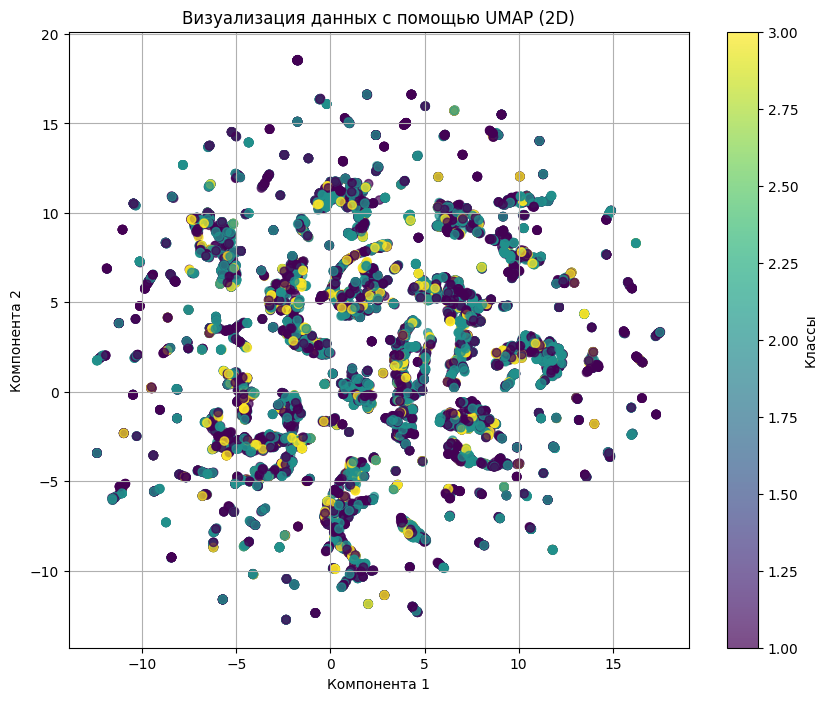

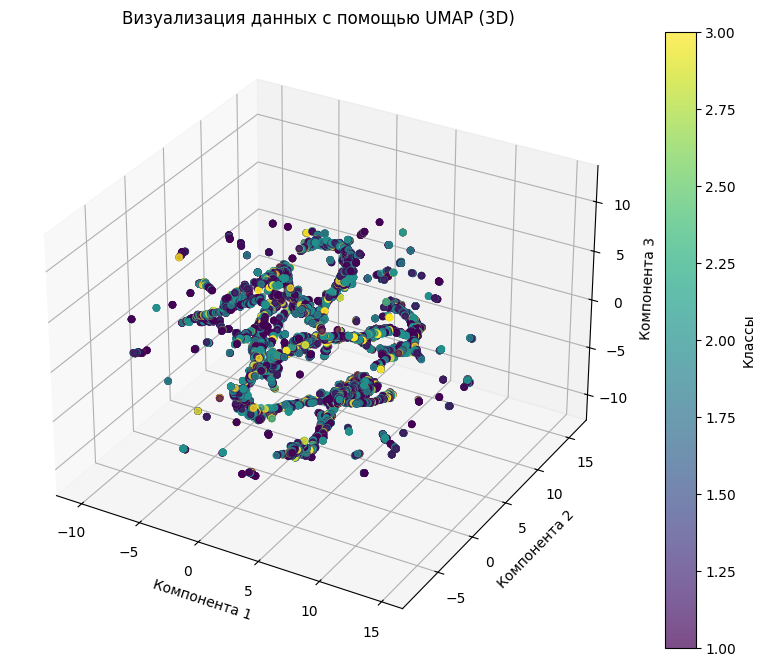

–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å UMAP (2D): 0.5250
–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å UMAP (3D): 0.5277


In [69]:
import umap.umap_ as umap
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é UMAP
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

umap_3d = umap.UMAP(n_components=3, random_state=42)
X_umap_3d = umap_3d.fit_transform(X_classification.select_dtypes(include=['float64', 'int64']))

# 2D –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ö–ª–∞—Å—Å—ã')
plt.title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é UMAP (2D)")
plt.xlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
plt.ylabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
plt.grid(True)
plt.show()

# 3D –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2], c=y_classification, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='–ö–ª–∞—Å—Å—ã')
ax.set_title("–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –¥–∞–Ω–Ω—ã—Ö —Å –ø–æ–º–æ—â—å—é UMAP (3D)")
ax.set_xlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
ax.set_ylabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
ax.set_zlabel("–ö–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 3")
plt.show()

# –ö–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏—è UMAP (2D –∏ 3D)
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train_2d, X_test_2d, y_train, y_test = train_test_split(X_umap_2d, y_classification, test_size=0.2, random_state=42)
X_train_3d, X_test_3d, y_train, y_test = train_test_split(X_umap_3d, y_classification, test_size=0.2, random_state=42)

# –ú–æ–¥–µ–ª—å
clf = RandomForestClassifier(random_state=42)

# –û–±—É—á–µ–Ω–∏–µ –Ω–∞ 2D –¥–∞–Ω–Ω—ã—Ö
clf.fit(X_train_2d, y_train)
y_pred_2d = clf.predict(X_test_2d)
accuracy_2d = accuracy_score(y_test, y_pred_2d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å UMAP (2D): {accuracy_2d:.4f}")

# –û–±—É—á–µ–Ω–∏–µ –Ω–∞ 3D –¥–∞–Ω–Ω—ã—Ö
clf.fit(X_train_3d, y_train)
y_pred_3d = clf.predict(X_test_3d)
accuracy_3d = accuracy_score(y_test, y_pred_3d)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏ —Å UMAP (3D): {accuracy_3d:.4f}")

In [100]:
import pandas as pd

# –ó–∞–≥—Ä—É–∑–∫–∞ —Ñ–∞–π–ª–∞
data = pd.read_csv('/content/pokemon.csv')

# –ü—Ä–æ—Å–º–æ—Ç—Ä –ø–µ—Ä–≤—ã—Ö —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞
data

Name     Type1   Type2   Evolution
0      bulbasaur     Grass  Poison     ivysaur
1        ivysaur     Grass  Poison    venusaur
2       venusaur     Grass  Poison         NaN
3     charmander      Fire     NaN  charmeleon
4     charmeleon      Fire     NaN   charizard
..           ...       ...     ...         ...
804    stakataka      Rock   Steel         NaN
805  blacephalon      Fire   Ghost         NaN
806      zeraora  Electric     NaN         NaN
807       meltan     Steel     NaN         NaN
808     melmetal     Steel     NaN         NaN

[809 rows x 4 columns]

In [101]:
import os

# –ü—É—Ç—å –∫ –ø–∞–ø–∫–µ —Å –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º–∏
image_folder = "/content/drive/MyDrive/images"

# –î–æ–±–∞–≤–ª—è–µ–º –ø—É—Ç–∏ –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º
data['Image'] = data['Name'].apply(lambda x: os.path.join(image_folder, f"{x}.png"))

In [102]:
data

Name     Type1   Type2   Evolution  \
0      bulbasaur     Grass  Poison     ivysaur   
1        ivysaur     Grass  Poison    venusaur   
2       venusaur     Grass  Poison         NaN   
3     charmander      Fire     NaN  charmeleon   
4     charmeleon      Fire     NaN   charizard   
..           ...       ...     ...         ...   
804    stakataka      Rock   Steel         NaN   
805  blacephalon      Fire   Ghost         NaN   
806      zeraora  Electric     NaN         NaN   
807       meltan     Steel     NaN         NaN   
808     melmetal     Steel     NaN         NaN   

                                             Image  
0      /content/drive/MyDrive/images/bulbasaur.png  
1        /content/drive/MyDrive/images/ivysaur.png  
2       /content/drive/MyDrive/images/venusaur.png  
3     /content/drive/MyDrive/images/charmander.png  
4     /content/drive/MyDrive/images/charmeleon.png  
..                                             ...  
804    /content/drive/MyDrive/images/stakataka.png  
805  /content/drive/MyDrive/images/blacephalon.png  
806      /content/drive/MyDrive/images/zeraora.png  
807       /content/drive/MyDrive/images/meltan.png  
808     /content/drive/MyDrive/images/melmetal.png  

[809 rows x 5 columns]

In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       809 non-null    object
 1   Type1      809 non-null    object
 2   Type2      405 non-null    object
 3   Evolution  32 non-null     object
 4   Image      809 non-null    object
dtypes: object(5)
memory usage: 31.7+ KB


In [104]:
# –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
for column in data.columns:
    print(f'{column}: {data[column].nunique()} —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π')

Name: 809 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
Type1: 18 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
Type2: 18 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
Evolution: 32 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
Image: 809 —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π


In [95]:
data['Type2'] = data['Type2'].fillna("None")  # –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ Type2
data['Evolution'] = data['Evolution'].fillna("None")  # –ó–∞–ø–æ–ª–Ω—è–µ–º –ø—Ä–æ–ø—É—Å–∫–∏ –≤ Evolution

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       809 non-null    object
 1   Type1      809 non-null    object
 2   Type2      809 non-null    object
 3   Evolution  809 non-null    object
 4   Image      809 non-null    object
dtypes: object(5)
memory usage: 31.7+ KB


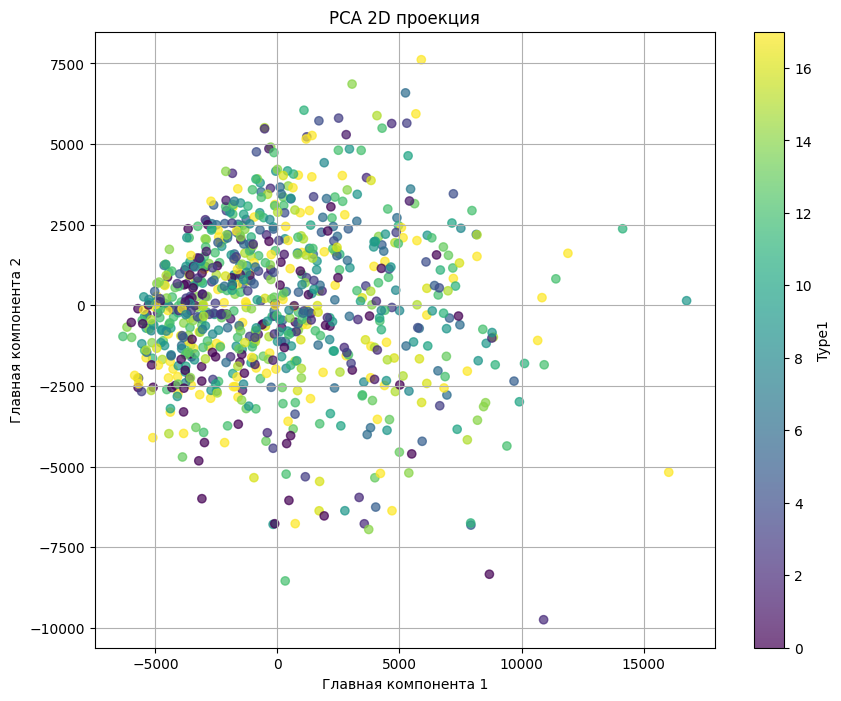

–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: 0.1667
–û—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:
              precision    recall  f1-score   support

         Bug       0.09      0.17      0.12        12
        Dark       0.33      0.75      0.46         4
      Dragon       0.00      0.00      0.00         3
    Electric       0.50      0.12      0.20         8
       Fairy       0.00      0.00      0.00         5
    Fighting       0.00      0.00      0.00        10
        Fire       0.12      0.12      0.12         8
      Flying       0.00      0.00      0.00         1
       Ghost       0.00      0.00      0.00         8
       Grass       0.16      0.20      0.18        15
      Ground       0.00      0.00      0.00        10
         Ice       0.00      0.00      0.00         4
      Normal       0.15      0.33      0.21        21
      Poison       0.00      0.00      0.00        10
     Psychic       0.00      0.00      0.00        10
        Rock       0.00      0.00      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [108]:
from PIL import Image

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–π –≤ –º–∞—Å—Å–∏–≤
image_data = []
labels = []

for _, row in data.iterrows():
    try:
        # –ó–∞–≥—Ä—É–∂–∞–µ–º –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏–µ –∏ –ø—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ grayscale
        img = Image.open(row['Image']).convert('RGB').resize((128, 128))
        image_data.append(np.array(img).flatten())  # –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ –æ–¥–Ω–æ–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤
        labels.append(row['Type1'])  # –ò—Å–ø–æ–ª—å–∑—É–µ–º Type1 –∫–∞–∫ –º–µ—Ç–∫—É
    except FileNotFoundError:
        print(f"–§–∞–π–ª –Ω–µ –Ω–∞–π–¥–µ–Ω: {row['Image']}")

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ numpy-–º–∞—Å—Å–∏–≤
X = np.array(image_data)
y = np.array(labels)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –º–µ—Ç–∫–∏ –≤ —á–∏—Å–ª–æ–≤—ã–µ
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Type1')
plt.title("PCA 2D –ø—Ä–æ–µ–∫—Ü–∏—è")
plt.xlabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
plt.ylabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
plt.grid(True)
plt.show()

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred = clf.predict(X_test)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
accuracy = accuracy_score(y_test, y_pred)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: {accuracy:.4f}")
print("–û—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

In [105]:
# –°—É–ø–µ—Ä—Ç–∏–ø—ã
type_mapping = {
    'Fire': 'Attack',
    'Electric': 'Attack',
    'Fighting': 'Attack',
    'Dragon': 'Attack',
    'Grass': 'Defense',
    'Water': 'Defense',
    'Ice': 'Defense',
    'Ground': 'Defense',
    'Rock': 'Defense',
    'Flying': 'Support',
    'Psychic': 'Support',
    'Normal': 'Support',
    'Ghost': 'Support',
    'Dark': 'Support',
    'Bug': 'Support',
    'Steel': 'Defense',
    'Poison': 'Support',
    'Fairy': 'Support'
}

# –ü—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ Type1 –≤ —Å—É–ø–µ—Ä—Ç–∏–ø—ã
data['SuperType'] = data['Type1'].map(type_mapping)

In [106]:
data

Name     Type1   Type2   Evolution  \
0      bulbasaur     Grass  Poison     ivysaur   
1        ivysaur     Grass  Poison    venusaur   
2       venusaur     Grass  Poison         NaN   
3     charmander      Fire     NaN  charmeleon   
4     charmeleon      Fire     NaN   charizard   
..           ...       ...     ...         ...   
804    stakataka      Rock   Steel         NaN   
805  blacephalon      Fire   Ghost         NaN   
806      zeraora  Electric     NaN         NaN   
807       meltan     Steel     NaN         NaN   
808     melmetal     Steel     NaN         NaN   

                                             Image SuperType  
0      /content/drive/MyDrive/images/bulbasaur.png   Defense  
1        /content/drive/MyDrive/images/ivysaur.png   Defense  
2       /content/drive/MyDrive/images/venusaur.png   Defense  
3     /content/drive/MyDrive/images/charmander.png    Attack  
4     /content/drive/MyDrive/images/charmeleon.png    Attack  
..                                             ...       ...  
804    /content/drive/MyDrive/images/stakataka.png   Defense  
805  /content/drive/MyDrive/images/blacephalon.png    Attack  
806      /content/drive/MyDrive/images/zeraora.png    Attack  
807       /content/drive/MyDrive/images/meltan.png   Defense  
808     /content/drive/MyDrive/images/melmetal.png   Defense  

[809 rows x 6 columns]

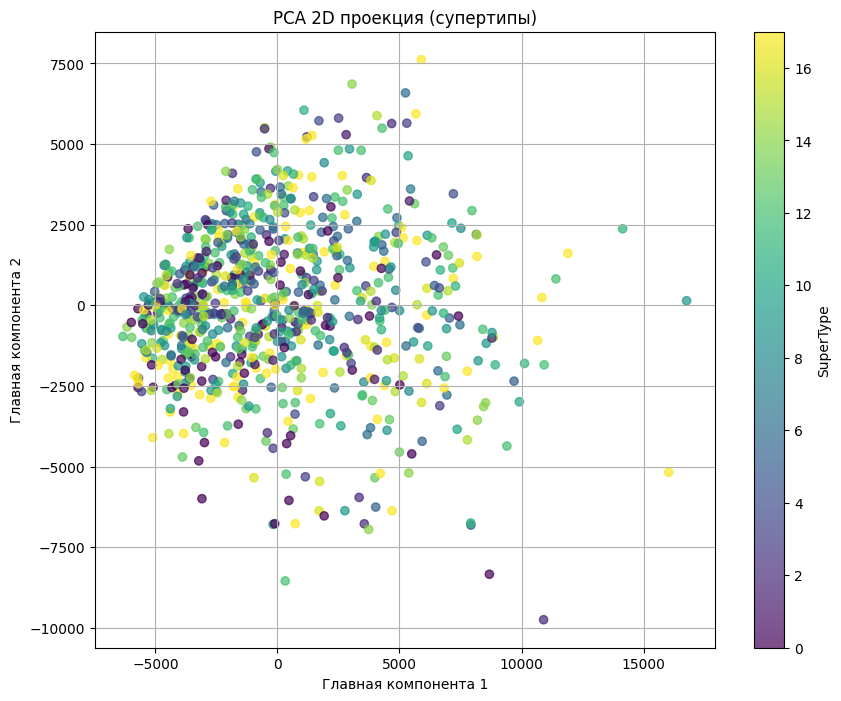

–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: 0.5309
–û—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:
              precision    recall  f1-score   support

      Attack       0.14      0.03      0.06        29
     Defense       0.56      0.50      0.53        62
     Support       0.54      0.76      0.63        71

    accuracy                           0.53       162
   macro avg       0.42      0.43      0.41       162
weighted avg       0.48      0.53      0.49       162



In [116]:
from sklearn.neighbors import KNeighborsClassifier
# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –º–µ—Ç–∫–∏ SuperType
labels = []
image_data = []
for _, row in data.iterrows():
    try:
        # –î–æ–±–∞–≤–ª—è–µ–º —Å—É–ø–µ—Ä—Ç–∏–ø –≤–º–µ—Å—Ç–æ –æ—Ä–∏–≥–∏–Ω–∞–ª—å–Ω–æ–≥–æ —Ç–∏–ø–∞
        img = Image.open(row['Image']).convert('RGB').resize((128, 128))
        image_data.append(np.array(img).flatten())
        labels.append(row['SuperType'])  # –ò—Å–ø–æ–ª—å–∑—É–µ–º SuperType –∫–∞–∫ –º–µ—Ç–∫—É
    except FileNotFoundError:
        print(f"–§–∞–π–ª –Ω–µ –Ω–∞–π–¥–µ–Ω: {row['Image']}")

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –≤ numpy –º–∞—Å—Å–∏–≤

X_sup = np.array(image_data)
y_sup = np.array(labels)

# –ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –º–µ—Ç–∫–∏ –≤ —á–∏—Å–ª–æ–≤—ã–µ
le = LabelEncoder()
y_encoded_sup = le.fit_transform(y_sup)

# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö
X_train, X_test, y_train, y_test = train_test_split(X_sup, y_encoded_sup, test_size=0.2, random_state=42)

# PCA –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_sup)

plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='SuperType')
plt.title("PCA 2D –ø—Ä–æ–µ–∫—Ü–∏—è (—Å—É–ø–µ—Ä—Ç–∏–ø—ã)")
plt.xlabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 1")
plt.ylabel("–ì–ª–∞–≤–Ω–∞—è –∫–æ–º–ø–æ–Ω–µ–Ω—Ç–∞ 2")
plt.grid(True)
plt.show()

# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏
clf = KNeighborsClassifier(n_neighbors=13)
clf.fit(X_train, y_train)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred = clf.predict(X_test)

# –û—Ü–µ–Ω–∫–∞ –º–æ–¥–µ–ª–∏
accuracy = accuracy_score(y_test, y_pred)
print(f"–¢–æ—á–Ω–æ—Å—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏: {accuracy:.4f}")
print("–û—Ç—á–µ—Ç –æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏:")
print(classification_report(y_test, y_pred, target_names=le.classes_))